# Lab 6: Optimizing FNNs with Keras
COSC 410: Applied Machine Learning\
Colgate University\
*Prof. Apthorpe*

This lab is due to Gradescope by the beginning of lab next week (2:45p on 3/10). You may work with a partner on this lab – if you do, submit only one solution as a “group” on Gradescope.

## Introduction

The purpose of this lab is for you to practice creating *and improving* feedforward networks. Upon completing this lab, you should be comfortable using the `Functional` API for creating networks, optimizing FNN hyperparameters, implementing overfitting reduction techniques, and identifying misclassified examples.

We will be using a new dataset, `rock_paper_scissors`, a collection of 300x300 pixel images of hands showing the symbol for "rock" (closed fist), "paper" (open hand), or "scissors" (two fingers in a "V"). The goal will be to train a model that can detect the symbol a hand is showing.

## Provided Files
 * `Lab6.ipynb`: This file
 
## Part 1: Data Import and Exploration

The following cell imports all needed libraries and loads the `rock_paper_scissors` dataset. 

**Note:** You will need to run `pip3 install ipywidgets tensorflow-datasets` *from within your virtual environment* and then restart Jupyter Lab before running the following cell.

In [1]:
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import keras as ks
import tensorflow as tf
from sklearn import metrics, model_selection
np.random.seed(0), tf.random.set_seed(1)

# load data and cache for future use
train_images, train_labels = tfds.as_numpy(tfds.load('rock_paper_scissors', split='train', batch_size=-1, as_supervised=True, shuffle_files=True))
test_images, test_labels = tfds.as_numpy(tfds.load('rock_paper_scissors', split='test', batch_size=-1, as_supervised=True, shuffle_files=True))

# convert images to grayscale
train_images = train_images.mean(axis=3)
test_images = test_images.mean(axis=3)

# create a validation set
train_images, val_images, train_labels, val_labels = model_selection.train_test_split(train_images, train_labels, test_size=0.15, shuffle=True)

# print dataset shape
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)
print()

# print counts of examples in each class
print(np.unique(train_labels, return_counts=True)[1])
print(np.unique(val_labels, return_counts=True)[1])
print(np.unique(test_labels, return_counts=True)[1])

2022-03-11 13:08:03.120970: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(2142, 300, 300)
(378, 300, 300)
(372, 300, 300)

[719 712 711]
[121 128 129]
[124 124 124]


The following cell defines a function for plotting multiple images side-by-side and then plots the first 10 examples in the training set:

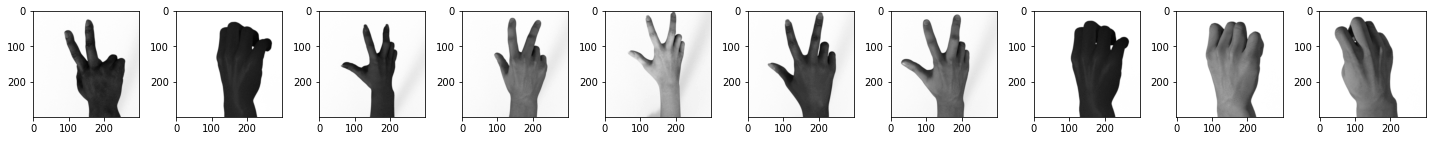

In [2]:
def plot_images(images):
    fig = plt.figure(tight_layout='auto', figsize=(20, 7))
    for i, img in enumerate(images):
        fig.add_subplot(1, len(images), i+1)
        plt.imshow(img, cmap="gray")
    return fig

plot_images(train_images[0:10])
pass

## Part 2: FNN Creation, Training, and Optimization

Your task is to create the best FNN model you can to make "rock paper scissors" predictions.

There are a few rules:

0. You must use the **Functional API** to create the models
1. You must try at least 3 different architectures with different numbers of hidden layers and different numbers of nodes per layer
2. You must try the following methods of reducing overfitting
    * Dropout OR Regularization
    * Training set augmentation
3. You must try at least 2 different values for each of 2 different hyperparameters from the following list:
    * Kernel initializer 
    * Dropout rate
    * Regularization penalty
4. You must NOT train on the test data (only use the training and validation data for this part of the lab)

This means that you will be performing at least 9 different model creation and trainings with the goal of selecting the model with the best **validation** accuracy. Note that you can tell `.fit()` what validation data to use with the keyword argument `validation_data=(val_images, val_labels)` INSTEAD of using `validation_split`. 

Place the code for each of these model creation and training attempts into separate cells below. 

In [3]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300,300]))
model.add(ks.layers.Dense(528, activation="relu"))
model.add(ks.layers.Dense(264, activation="relu"))
model.add(ks.layers.Dense(132, activation="relu"))
model.add(ks.layers.Dense(66, activation="relu"))
model.add(ks.layers.Dense(33, activation="softmax"))



model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
17/17 [==============================] - 14s 691ms/step - loss: 26448.1934 - accuracy: 0.1849 - val_loss: 5598.6567 - val_accuracy: 0.3201
Epoch 2/10
17/17 [==============================] - 10s 589ms/step - loss: 4924.9126 - accuracy: 0.2670 - val_loss: 979.5422 - val_accuracy: 0.3413
Epoch 3/10
17/17 [==============================] - 10s 582ms/step - loss: 2360.5259 - accuracy: 0.3184 - val_loss: 2989.6575 - val_accuracy: 0.3413
Epoch 4/10
17/17 [==============================] - 8s 498ms/step - loss: 2234.7712 - accuracy: 0.3049 - val_loss: 672.0388 - val_accuracy: 0.3413
Epoch 5/10
17/17 [==============================] - 8s 494ms/step - loss: 760.1163 - accuracy: 0.3137 - val_loss: 908.1541 - val_accuracy: 0.3413
Epoch 6/10
17/17 [==============================] - 8s 498ms/step - loss: 528.3234 - accuracy: 0.3305 - val_loss: 1503.0980 - val_accuracy: 0.0000e+00
Epoch 7/10
17/17 [==============================] - 9s 525ms/step - loss: 284.4845 - accuracy: 0.3035 - val_l

In [4]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300,300]))

model.add(ks.layers.Dense(256, activation="relu"))
model.add(ks.layers.Dense(128, activation="relu"))
model.add(ks.layers.Dense(64, activation="relu"))
model.add(ks.layers.Dense(32, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=(0.15))



Epoch 1/10
15/15 [==============================] - 6s 307ms/step - loss: 18831.4922 - accuracy: 0.2473 - val_loss: 5273.0815 - val_accuracy: 0.3075
Epoch 2/10
15/15 [==============================] - 4s 225ms/step - loss: 7568.1416 - accuracy: 0.3192 - val_loss: 7541.9146 - val_accuracy: 0.3168
Epoch 3/10
15/15 [==============================] - 3s 215ms/step - loss: 5691.1235 - accuracy: 0.3390 - val_loss: 4340.6509 - val_accuracy: 0.3168
Epoch 4/10
15/15 [==============================] - 3s 209ms/step - loss: 3363.9636 - accuracy: 0.3352 - val_loss: 1363.8849 - val_accuracy: 0.3168
Epoch 5/10
15/15 [==============================] - 3s 215ms/step - loss: 3361.2329 - accuracy: 0.3264 - val_loss: 3034.0806 - val_accuracy: 0.3168
Epoch 6/10
15/15 [==============================] - 3s 216ms/step - loss: 1938.4059 - accuracy: 0.3418 - val_loss: 1378.4435 - val_accuracy: 0.3168
Epoch 7/10
15/15 [==============================] - 3s 211ms/step - loss: 1375.2616 - accuracy: 0.3412 - val_lo

In [5]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300,300]))
model.add(ks.layers.Dense(1024, activation="relu"))
model.add(ks.layers.Dense(512, activation="relu"))
model.add(ks.layers.Dense(256, activation="relu"))
model.add(ks.layers.Dense(128, activation="relu"))
model.add(ks.layers.Dense(64, activation="relu"))
model.add(ks.layers.Dense(32, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
17/17 [==============================] - 29s 2s/step - loss: 23805.6953 - accuracy: 0.2824 - val_loss: 2070.3965 - val_accuracy: 0.3386
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 2242.5557 - accuracy: 0.3119 - val_loss: 445.7497 - val_accuracy: 0.3413
Epoch 3/10
17/17 [==============================] - 16s 934ms/step - loss: 580.9354 - accuracy: 0.3585 - val_loss: 126.7787 - val_accuracy: 0.3386
Epoch 4/10
17/17 [==============================] - 16s 945ms/step - loss: 12.2315 - accuracy: 0.3273 - val_loss: 3.2727 - val_accuracy: 0.3439
Epoch 5/10
17/17 [==============================] - 16s 925ms/step - loss: 3.1631 - accuracy: 0.3385 - val_loss: 10.6533 - val_accuracy: 0.3466
Epoch 6/10
17/17 [==============================] - 16s 942ms/step - loss: 61.4443 - accuracy: 0.3324 - val_loss: 2.8642 - val_accuracy: 0.3413
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 2.7260 - accuracy: 0.3389 - val_loss: 2.5562 - val_accura

In [6]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300,300]))
model.add(ks.layers.Dense(528, activation="relu",kernel_regularizer=ks.regularizers.l1(0.001)))
model.add(ks.layers.Dense(264, activation="relu",kernel_regularizer=ks.regularizers.l1(0.001)))
model.add(ks.layers.Dense(132, activation="relu",kernel_regularizer=ks.regularizers.l1(0.001)))
model.add(ks.layers.Dense(66, activation="relu",kernel_regularizer=ks.regularizers.l1(0.001)))
model.add(ks.layers.Dense(33, activation="softmax",kernel_regularizer=ks.regularizers.l1(0.001)))



model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
17/17 [==============================] - 18s 860ms/step - loss: 26819.2422 - accuracy: 0.2726 - val_loss: 16585.4629 - val_accuracy: 0.3201
Epoch 2/10
17/17 [==============================] - 12s 668ms/step - loss: 7500.0112 - accuracy: 0.3165 - val_loss: 4043.4253 - val_accuracy: 0.0000e+00
Epoch 3/10
17/17 [==============================] - 13s 745ms/step - loss: 4372.5337 - accuracy: 0.3007 - val_loss: 6924.7979 - val_accuracy: 0.3413
Epoch 4/10
17/17 [==============================] - 11s 674ms/step - loss: 2322.8174 - accuracy: 0.3492 - val_loss: 2688.2893 - val_accuracy: 0.3386
Epoch 5/10
17/17 [==============================] - 11s 651ms/step - loss: 1927.5494 - accuracy: 0.3380 - val_loss: 3994.4209 - val_accuracy: 0.3201
Epoch 6/10
17/17 [==============================] - 11s 653ms/step - loss: 2014.7911 - accuracy: 0.3231 - val_loss: 2321.3611 - val_accuracy: 0.3201
Epoch 7/10
17/17 [==============================] - 11s 656ms/step - loss: 1807.4484 - accuracy: 0.3

In [22]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300, 300]))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(528, activation="relu"))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(264, activation="relu"))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(132, activation="relu"))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(66, activation="relu"))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(3, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))


Epoch 1/10
17/17 [==============================] - 16s 826ms/step - loss: 18.0546 - accuracy: 0.6713 - val_loss: 4160.5415 - val_accuracy: 0.3201
Epoch 2/10
17/17 [==============================] - 11s 665ms/step - loss: 2.1142 - accuracy: 0.8697 - val_loss: 2332.5627 - val_accuracy: 0.3201
Epoch 3/10
17/17 [==============================] - 11s 654ms/step - loss: 2.7527 - accuracy: 0.8940 - val_loss: 2923.9812 - val_accuracy: 0.3386
Epoch 4/10
17/17 [==============================] - 11s 668ms/step - loss: 2.6893 - accuracy: 0.8908 - val_loss: 1975.3019 - val_accuracy: 0.3386
Epoch 5/10
17/17 [==============================] - 12s 679ms/step - loss: 1.5116 - accuracy: 0.9374 - val_loss: 1796.4884 - val_accuracy: 0.3201
Epoch 6/10
17/17 [==============================] - 11s 666ms/step - loss: 0.8058 - accuracy: 0.9617 - val_loss: 1764.3282 - val_accuracy: 0.3386
Epoch 7/10
17/17 [==============================] - 12s 693ms/step - loss: 0.8298 - accuracy: 0.9636 - val_loss: 2601.5776 

In [8]:
data_augmentation = tf.keras.Sequential([
  ks.layers.RandomFlip("horizontal"), 
  ks.layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
])


model = ks.models.Sequential([
    data_augmentation,
    ks.layers.Flatten(input_shape=[300, 300]),
    ks.layers.BatchNormalization(),
    ks.layers.Dense(528, activation="relu"),
    ks.layers.Dense(264, activation="relu"),
    ks.layers.Dense(132, activation="relu"),
    ks.layers.Dense(66, activation="relu"),
    ks.layers.Dense(33, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# The data augmentation layers require examples of type float32 instead of CIFAR-10's default uint8, so we typecast before training 
train_images = tf.cast(train_images, dtype=tf.float32)

model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
17/17 [==============================] - 15s 794ms/step - loss: 24.6256 - accuracy: 0.2979 - val_loss: 616.0847 - val_accuracy: 0.3413
Epoch 2/10
17/17 [==============================] - 13s 800ms/step - loss: 7.4217 - accuracy: 0.3469 - val_loss: 545.8846 - val_accuracy: 0.3201
Epoch 3/10
17/17 [==============================] - 12s 733ms/step - loss: 3.9928 - accuracy: 0.3273 - val_loss: 168.6858 - val_accuracy: 0.3386
Epoch 4/10
17/17 [==============================] - 12s 730ms/step - loss: 4.5294 - accuracy: 0.3371 - val_loss: 111.3395 - val_accuracy: 0.3413
Epoch 5/10
17/17 [==============================] - 13s 738ms/step - loss: 2.7232 - accuracy: 0.3277 - val_loss: 19.3217 - val_accuracy: 0.3148
Epoch 6/10
17/17 [==============================] - 13s 737ms/step - loss: 1.9546 - accuracy: 0.3389 - val_loss: 8.4284 - val_accuracy: 0.3915
Epoch 7/10
17/17 [==============================] - 14s 856ms/step - loss: 1.9508 - accuracy: 0.3240 - val_loss: 45.7583 - val_accur

In [9]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300,300]))
model.add(ks.layers.Dense(528, activation="relu",kernel_regularizer=ks.regularizers.l1(0.001)))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(264, activation="relu",kernel_regularizer=ks.regularizers.l1(0.001)))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(132, activation="relu",kernel_regularizer=ks.regularizers.l1(0.001)))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(66, activation="relu",kernel_regularizer=ks.regularizers.l1(0.001)))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(33, activation="softmax",kernel_regularizer=ks.regularizers.l1(0.001)))


model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
17/17 [==============================] - 16s 717ms/step - loss: 14378.4229 - accuracy: 0.3049 - val_loss: 1415.7079 - val_accuracy: 0.3307
Epoch 2/10
17/17 [==============================] - 12s 673ms/step - loss: 1361.5632 - accuracy: 0.3109 - val_loss: 480.9941 - val_accuracy: 0.3413
Epoch 3/10
17/17 [==============================] - 12s 708ms/step - loss: 781.9303 - accuracy: 0.2993 - val_loss: 273.8386 - val_accuracy: 0.2778
Epoch 4/10
17/17 [==============================] - 11s 676ms/step - loss: 470.1237 - accuracy: 0.3128 - val_loss: 296.2960 - val_accuracy: 0.3413
Epoch 5/10
17/17 [==============================] - 12s 684ms/step - loss: 404.0326 - accuracy: 0.3137 - val_loss: 181.5313 - val_accuracy: 0.3413
Epoch 6/10
17/17 [==============================] - 13s 762ms/step - loss: 290.5110 - accuracy: 0.3035 - val_loss: 276.1869 - val_accuracy: 0.3201
Epoch 7/10
17/17 [==============================] - 12s 717ms/step - loss: 302.3061 - accuracy: 0.3151 - val_loss:

In [10]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300,300]))
model.add(ks.layers.Dense(528, activation="relu",kernel_regularizer=ks.regularizers.l2(0.001)))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(264, activation="relu",kernel_regularizer=ks.regularizers.l2(0.001)))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(132, activation="relu",kernel_regularizer=ks.regularizers.l2(0.001)))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(66, activation="relu",kernel_regularizer=ks.regularizers.l2(0.001)))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(33, activation="softmax",kernel_regularizer=ks.regularizers.l2(0.001)))


model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
17/17 [==============================] - 14s 727ms/step - loss: 9097.8721 - accuracy: 0.2017 - val_loss: 1625.3459 - val_accuracy: 0.3413
Epoch 2/10
17/17 [==============================] - 12s 693ms/step - loss: 1211.9796 - accuracy: 0.2278 - val_loss: 373.7203 - val_accuracy: 0.3386
Epoch 3/10
17/17 [==============================] - 12s 703ms/step - loss: 698.6370 - accuracy: 0.2320 - val_loss: 145.3805 - val_accuracy: 0.3386
Epoch 4/10
17/17 [==============================] - 12s 679ms/step - loss: 194.6670 - accuracy: 0.2157 - val_loss: 10.5938 - val_accuracy: 0.3386
Epoch 5/10
17/17 [==============================] - 12s 678ms/step - loss: 76.4748 - accuracy: 0.2530 - val_loss: 4.9182 - val_accuracy: 0.3201
Epoch 6/10
17/17 [==============================] - 12s 702ms/step - loss: 14.9065 - accuracy: 0.3137 - val_loss: 4.8170 - val_accuracy: 0.3201
Epoch 7/10
17/17 [==============================] - 12s 724ms/step - loss: 13.9130 - accuracy: 0.3170 - val_loss: 4.6946 -

In [11]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300,300]))
model.add(ks.layers.Dense(528, activation="relu",kernel_regularizer=ks.regularizers.l2(0.01)))
model.add(ks.layers.Dropout(rate=0.15))
model.add(ks.layers.Dense(264, activation="relu",kernel_regularizer=ks.regularizers.l2(0.01)))
model.add(ks.layers.Dropout(rate=0.15))
model.add(ks.layers.Dense(132, activation="relu",kernel_regularizer=ks.regularizers.l2(0.01)))
model.add(ks.layers.Dropout(rate=0.15))
model.add(ks.layers.Dense(66, activation="relu",kernel_regularizer=ks.regularizers.l2(0.01)))
model.add(ks.layers.Dropout(rate=0.15))
model.add(ks.layers.Dense(33, activation="softmax",kernel_regularizer=ks.regularizers.l2(0.01)))


model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))



Epoch 1/10
17/17 [==============================] - 17s 905ms/step - loss: 9445.9619 - accuracy: 0.2577 - val_loss: 168.9132 - val_accuracy: 0.3492
Epoch 2/10
17/17 [==============================] - 14s 791ms/step - loss: 1056.8611 - accuracy: 0.2932 - val_loss: 477.5963 - val_accuracy: 0.3413
Epoch 3/10
17/17 [==============================] - 12s 695ms/step - loss: 536.2932 - accuracy: 0.3063 - val_loss: 176.4693 - val_accuracy: 0.3413
Epoch 4/10
17/17 [==============================] - 12s 688ms/step - loss: 245.8581 - accuracy: 0.3035 - val_loss: 212.8798 - val_accuracy: 0.3413
Epoch 5/10
17/17 [==============================] - 12s 684ms/step - loss: 108.8710 - accuracy: 0.3067 - val_loss: 57.8331 - val_accuracy: 0.3386
Epoch 6/10
17/17 [==============================] - 12s 694ms/step - loss: 97.8478 - accuracy: 0.3245 - val_loss: 15.4459 - val_accuracy: 0.3386
Epoch 7/10
17/17 [==============================] - 11s 673ms/step - loss: 41.7208 - accuracy: 0.3161 - val_loss: 28.85

## Part 3: Inspecting Difficult Examples

Your next task is to identify which **test** examples your model classifies incorrectly and inspect enough of these examples to answer the following questions:

0. What is your model's accuracy on the test data?
1. Do the misclassified examples share any similarities that you think might make them more challenging? Explain your reasoning. 
2. Do you think these misclassifications could have been avoided with changes to the data collection process? Explain your reasoning. 
3. Do the misclassified examples surprise you and/or teach you something aboout the classification task you didn't understand at the outset? Explain your reasoning. 

In [31]:
model = ks.models.Sequential()
model.add(ks.layers.Flatten(input_shape=[300, 300]))
model.add(ks.layers.BatchNormalization())
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(528, activation="relu"))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(264, activation="relu"))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(132, activation="relu"))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(66, activation="relu"))
model.add(ks.layers.Dropout(rate=0.1))
model.add(ks.layers.Dense(3, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_data=(val_images, val_labels))





Epoch 1/10
17/17 [==============================] - 15s 825ms/step - loss: 15.1532 - accuracy: 0.6825 - val_loss: 3383.2712 - val_accuracy: 0.3201
Epoch 2/10
17/17 [==============================] - 14s 816ms/step - loss: 2.1191 - accuracy: 0.8618 - val_loss: 4544.0117 - val_accuracy: 0.3386
Epoch 3/10
17/17 [==============================] - 14s 805ms/step - loss: 2.1178 - accuracy: 0.8842 - val_loss: 2696.0608 - val_accuracy: 0.3386
Epoch 4/10
17/17 [==============================] - 11s 661ms/step - loss: 1.3176 - accuracy: 0.9360 - val_loss: 1736.2308 - val_accuracy: 0.3386
Epoch 5/10
17/17 [==============================] - 12s 704ms/step - loss: 1.0223 - accuracy: 0.9505 - val_loss: 2196.2559 - val_accuracy: 0.3201
Epoch 6/10
17/17 [==============================] - 11s 665ms/step - loss: 1.7393 - accuracy: 0.9300 - val_loss: 924.8160 - val_accuracy: 0.3386
Epoch 7/10
17/17 [==============================] - 11s 666ms/step - loss: 1.4641 - accuracy: 0.9519 - val_loss: 356.6931 - 

The test accuracy is 0.3736559139784946
[1 0 1 0 1 0 1 1 1 1 1 1 1 0 1]
[2 1 2 0 0 0 1 1 2 1 2 2 0 0 0]


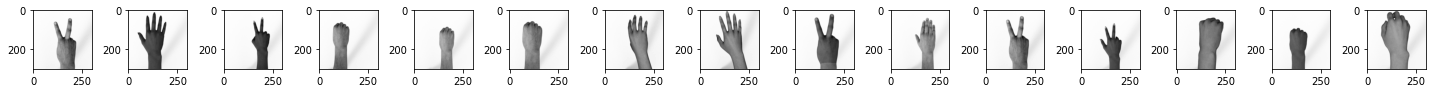

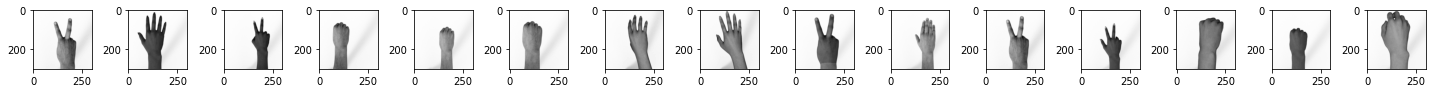

In [37]:
test_predictions = np.argmax(model.predict(test_images), axis=1)
test_accuracy = metrics.accuracy_score(test_labels, test_predictions)
print(f"The test accuracy is {test_accuracy}")

print(test_predictions[0:15])
print(test_labels[0:15])
plot_images(test_images[0:15])

Your Question Responses Here
0. Our test accuracy is 0.374

1. Our model doesn't correctly predict any 2's in the test data but was able to during training and to a lesser extent validation. We think that the amount of white space/background, color of hand, angle of fist, and how fingers are spread might make them harder to classify because some rocks look similar to other hands and some scissors look like paper when the thumb is extended in addition to index and middle finger. 

2. The issues could be prevented by creating a standard way of making each of the three signs but that would be less related to real world predictions where people have differences in how they form the hand signs. The data could however be processed such that there aren't differences (gray stripe being covered more or less by hand) in background that might cause the classification to focus on background rather than other features. 

3. The misclassifications make sense when looking at how similar different hand signs can look but our algorithm never predicting one of the three classes was surprising. We might have needed to change something about our model so that it predicts 2 in the training data and we would be interested in hearing why our model doesn't predict 2s. We also learned how hard classification can since the basis for prediction here is a very simple game that most children can determine the hand signs but algorithms can struggle with. 


# Submission Instructions
Submit your completed  `Lab7.ipynb` to Gradescope. Be sure to list all of your group members in the submission!
